# Illustration of Gaussian, sub-Gaussian and super-Gaussian Distribution

In [1]:
import jax
import jax.numpy as jnp
from jax.scipy.stats import uniform, laplace, norm
import matplotlib.pyplot as plt
import seaborn as sns

try:
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

seed = 48

In [2]:
latexify(width_scale_factor=1.70, fig_height=2)

/home/tensorboy/dev/env/lib/python3.8/site-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


## Combined 1-D graph of all three distribution

/home/tensorboy/dev/env/lib/python3.8/site-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


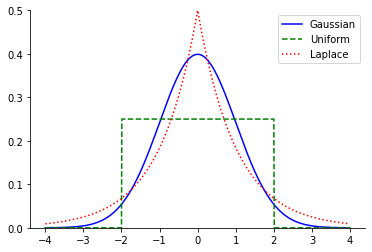

In [3]:
def draw_distributions(x, seed=42):

    normal_dist = norm.pdf(x, 0, 1)
    uniform_dist = uniform.pdf(x, -2, 4)
    laplace_dist = laplace.pdf(x, 0, 1)

    plt.figure()
    plt.plot(x, normal_dist, color="blue", linestyle="solid", label="Gaussian")
    plt.plot(x, uniform_dist, color="green", linestyle="dashed", label="Uniform")
    plt.plot(x, laplace_dist, color="red", linestyle="dotted", label="Laplace")

    plt.ylim(0, 0.5)
    plt.legend()
    sns.despine()

    savefig("1D")
    plt.show()


x = jnp.arange(-4, 4, 0.01)

draw_distributions(x)

## Gaussian Distribution

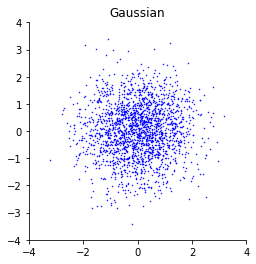

In [4]:
def draw_gaussian(n, seed=48):
    key = jax.random.PRNGKey(seed)
    key, subkey = jax.random.split(key)

    x1 = jax.random.normal(key, shape=(n, 1))
    x2 = jax.random.normal(subkey, shape=(n, 1))

    plt.figure()
    plt.scatter(x1, x2, marker=".", color="blue", s=1)

    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.title("Gaussian")
    sns.despine()
    plt.gca().set_aspect("equal")

    savefig("Gaussian")
    plt.show()


n = 2000
draw_gaussian(n)

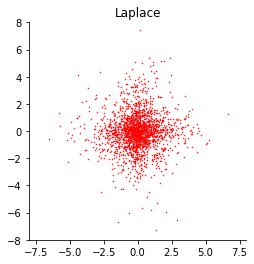

In [5]:
def draw_laplace(n, seed=48):

    key = jax.random.PRNGKey(seed)
    key, subkey = jax.random.split(key)

    x1 = jax.random.laplace(key, shape=(n, 1))
    x2 = jax.random.laplace(subkey, shape=(n, 1))

    plt.figure()
    plt.scatter(x1, x2, marker=".", color="red", s=1)

    plt.xlim(-8, 8)
    plt.ylim(-8, 8)
    plt.title("Laplace")
    sns.despine()
    plt.gca().set_aspect("equal")

    savefig("Laplace")
    plt.show()


n = 2000
draw_laplace(n)

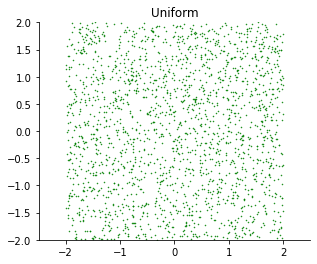

In [6]:
def draw_uniform(n, seed=48):
    key = jax.random.PRNGKey(seed)
    key, subkey = jax.random.split(key)

    x1 = jax.random.uniform(key, minval=-2.0, maxval=2.0, shape=(n, 1))
    x2 = jax.random.uniform(subkey, minval=-2.0, maxval=2.0, shape=(n, 1))

    plt.figure()
    plt.scatter(x1, x2, marker=".", color="green", s=1)

    plt.xlim(-2.5, 2.5)
    plt.ylim(-2, 2)
    plt.title("Uniform")
    sns.despine()
    plt.gca().set_aspect("equal")

    savefig("Uniform")
    plt.show()


n = 2000
draw_uniform(n)

## Interactive Demo

In [7]:
from ipywidgets import interact


@interact(mu_1=(-2.0, 2.0), std_1=(0.5, 2.0), mu_2=(-2.0, 2.0), std_2=(0.5, 2.0))
def generate_interactinve_gaussian(mu_1, std_1, mu_2, std_2):
    seed = 48
    n = 2000

    key = jax.random.PRNGKey(seed)
    key, subkey = jax.random.split(key)

    x1 = mu_1 + std_1 * jax.random.normal(key, (n, 1))
    x2 = mu_2 + std_2 * jax.random.normal(subkey, shape=(n, 1))

    plt.scatter(x1, x2, marker=".", color="blue", s=1)
    plt.gca().set_aspect("equal")
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    sns.despine()
    plt.title("Gaussian")

interactive(children=(FloatSlider(value=0.0, description='mu_1', max=2.0, min=-2.0), FloatSlider(value=1.25, d…

In [8]:
@interact(loc_1=(-2.0, 2.0), scale_1=(0.5, 2.0), loc_2=(-2.0, 2.0), scale_2=(0.5, 2.0))
def generate_interactinve_laplace(loc_1, scale_1, loc_2, scale_2):
    seed = 48
    n = 2000

    key = jax.random.PRNGKey(seed)
    key, subkey = jax.random.split(key)

    x1 = loc_1 + scale_1 * jax.random.laplace(key, shape=(n, 1))
    x2 = loc_2 + scale_2 * jax.random.laplace(subkey, shape=(n, 1))

    plt.scatter(x1, x2, marker=".", color="red", s=1)

    plt.gca().set_aspect("equal")
    plt.xlim(-8, 8)
    plt.ylim(-8, 8)
    sns.despine()
    plt.title("Laplace")

interactive(children=(FloatSlider(value=0.0, description='loc_1', max=2.0, min=-2.0), FloatSlider(value=1.25, …

In [9]:
@interact(minval_1=(-2.0, 2.0), maxval_1=(-2.0, 2.0), minval_2=(-2.0, 2.0), maxval_2=(-2.0, 2.0))
def generate_interactinve_unifrorm(minval_1, maxval_1, minval_2, maxval_2):

    if minval_1 > maxval_1 or minval_2 > maxval_2:
        print("Min val must be Less")
        return

    seed = 48
    n = 2000

    key = jax.random.PRNGKey(seed)
    key, subkey = jax.random.split(key)

    x1 = jax.random.uniform(key, minval=minval_1, maxval=maxval_1, shape=(n, 1))
    x2 = jax.random.uniform(subkey, minval=minval_2, maxval=maxval_2, shape=(n, 1))

    plt.scatter(x1, x2, marker=".", color="green", s=1)

    plt.gca().set_aspect("equal")
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2, 2)
    sns.despine()
    plt.title("Uniform")

interactive(children=(FloatSlider(value=0.0, description='minval_1', max=2.0, min=-2.0), FloatSlider(value=0.0…